# Import Libraries

In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook
#import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
import gc
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", message="divide by zero encountered") 
warnings.filterwarnings("ignore", message="invalid value encountered")

# READING THE DATASET AND CREATE TITANIC

In [22]:
titan = r'C:\Users\OLYMPIA\Desktop\Master en BIGDATA\Python on Zeppelin\titanic.csv'
titanic = pd.read_csv(titan, sep=',', encoding='latin_1')

In [23]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
Survived                   887 non-null int64
Pclass                     887 non-null int64
Name                       887 non-null object
Sex                        887 non-null object
Age                        887 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.5+ KB


In [24]:
titanic['Parents/Children Aboard'].value_counts()

0    674
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parents/Children Aboard, dtype: int64

In [25]:
titanic['survived'] = titanic['Survived'].map({1:'Alive', 0:'Dead'}) 

# PAIRPLOTS

<IPython.core.display.Javascript object>


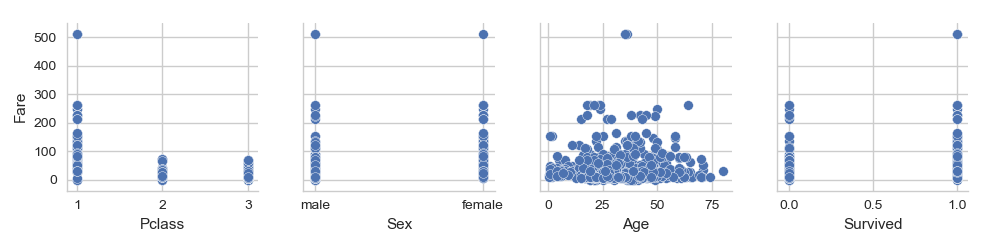

In [29]:
sns.pairplot(data=titanic,
                  y_vars=['Fare'],
                  x_vars=['Pclass', 'Sex','Age', 'Survived'])

<IPython.core.display.Javascript object>


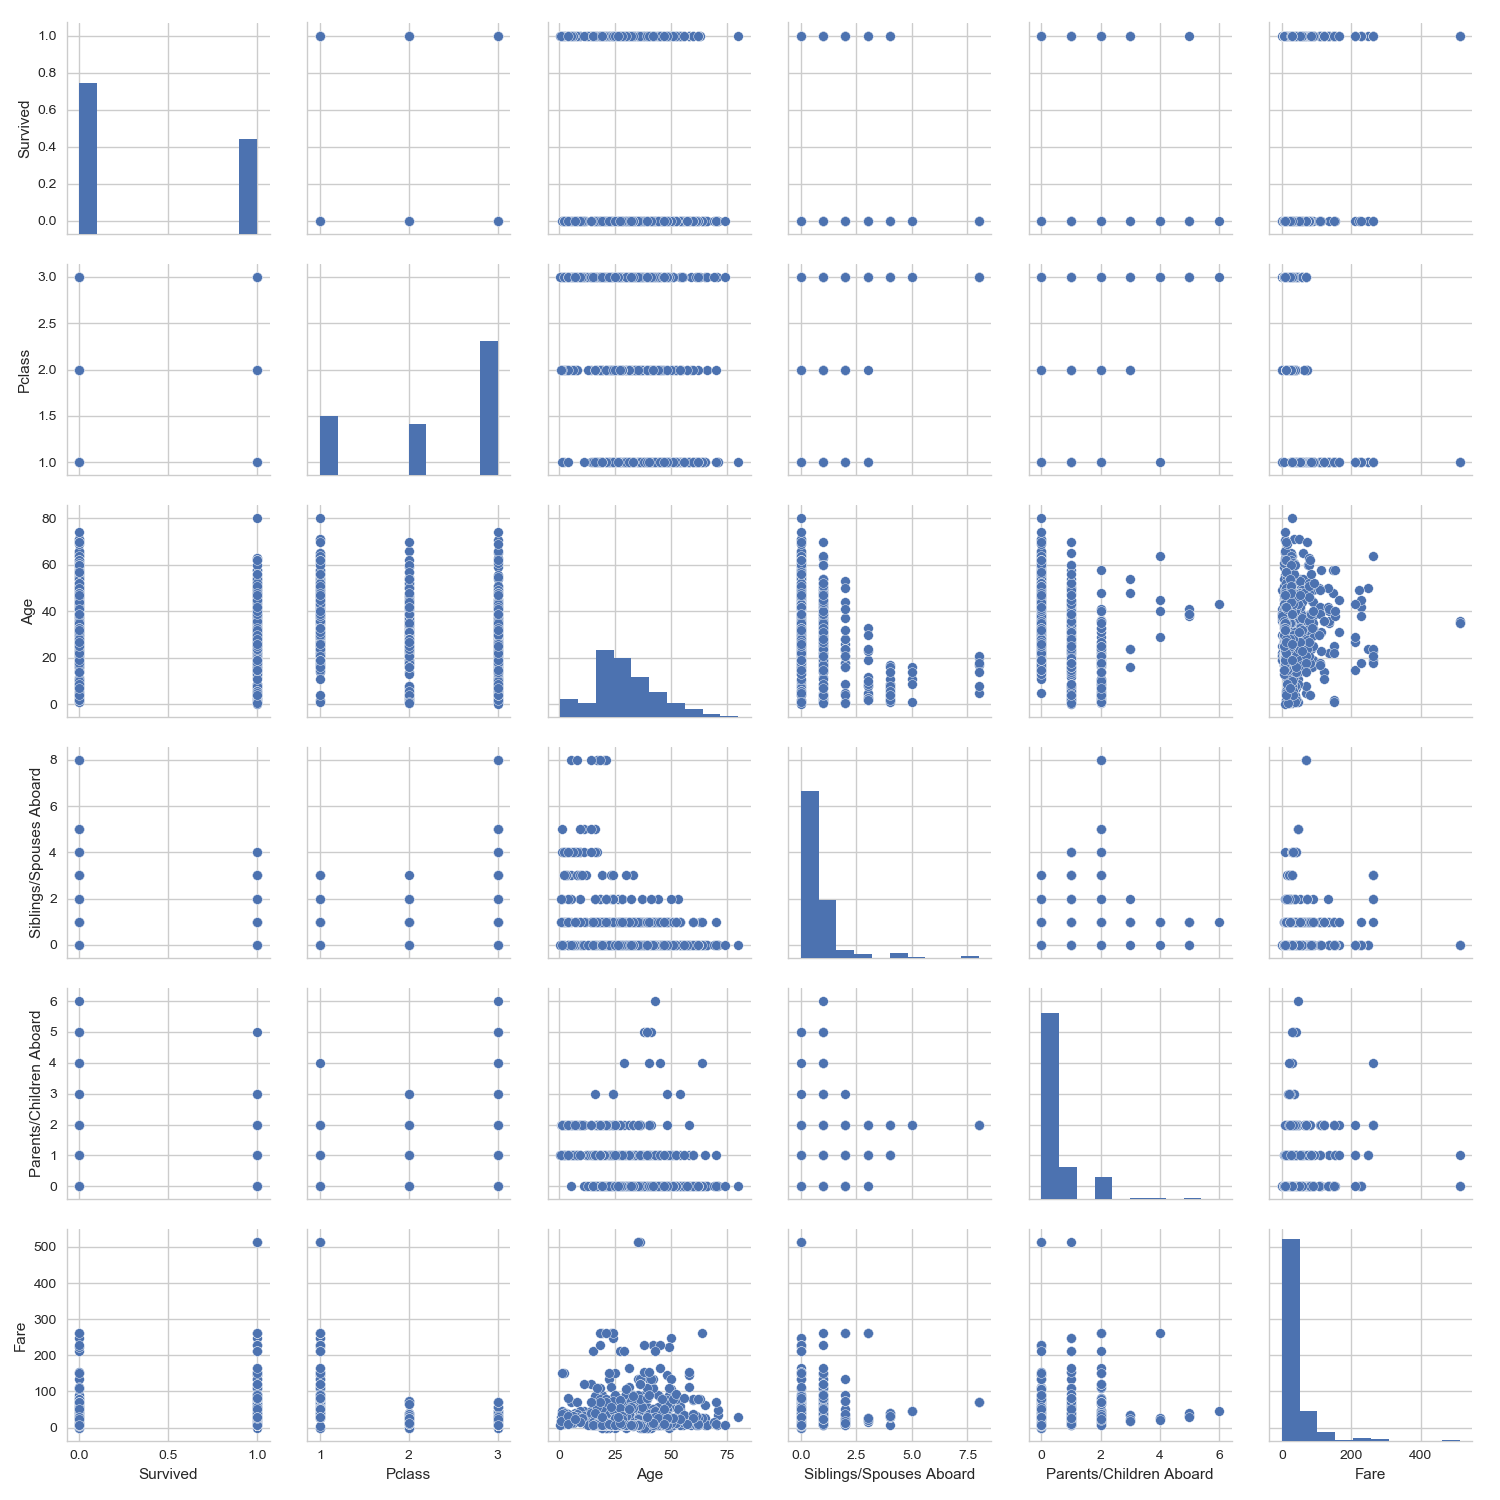

In [27]:
sns.pairplot(data=titanic)


# Alive/Dead) against Passenger Class

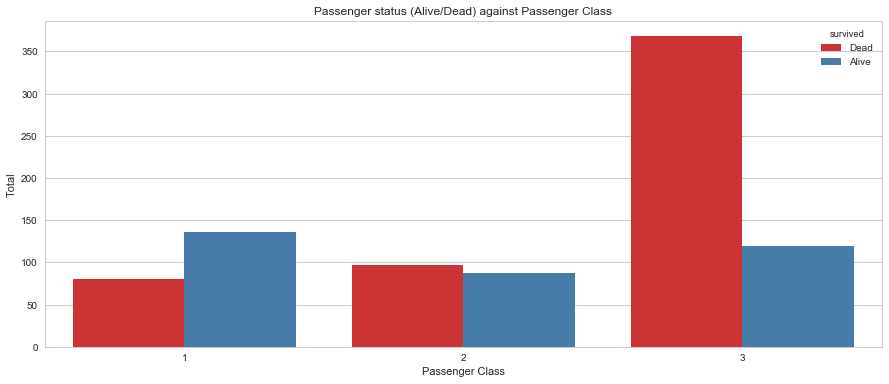

In [10]:

from matplotlib import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 15,6

titanic['survived'] = titanic['Survived'].map({1:'Alive', 0:'Dead'}) 

ax = sns.countplot(x = 'Pclass', hue = 'survived', palette = 'Set1', data = titanic)
ax.set(title = 'Passenger status (Alive/Dead) against Passenger Class', 
       xlabel = 'Passenger Class', ylabel = 'Total')
plt.show()

# DISTRIBUTION PLOT OF THE AGE SPLITTED OVER THE THREE CLASSES OF PASSENGERS CABINS

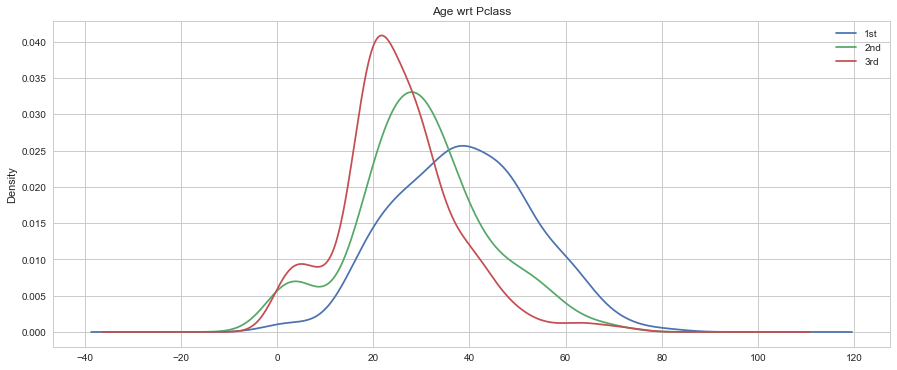

In [11]:
for x in [1,2,3]:    ## for 3 classes
    titanic.Age[titanic.Pclass == x].plot(kind="kde")
plt.title("Age wrt Pclass")
plt.legend(("1st","2nd","3rd"))

# SCATTERPLOT

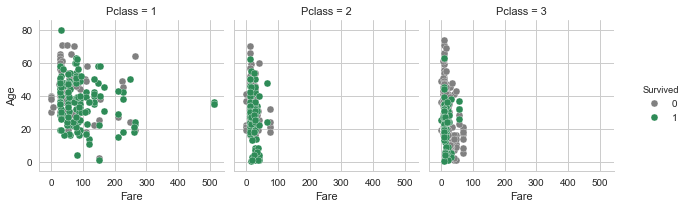

In [12]:
g = sns.FacetGrid(titanic, hue="Survived", col="Pclass", margin_titles=True,
                  palette={1:"seagreen", 0:"gray"})
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()

# LMPLOTS

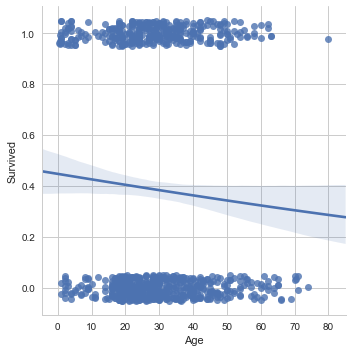

In [13]:
sns.lmplot("Age", "Survived", titanic, logistic=True, y_jitter=.05)

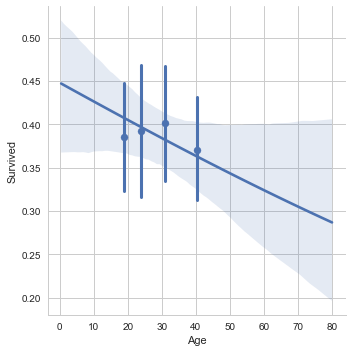

In [14]:
sns.lmplot("Age", "Survived", titanic, logistic=True, x_bins=4, truncate=True)

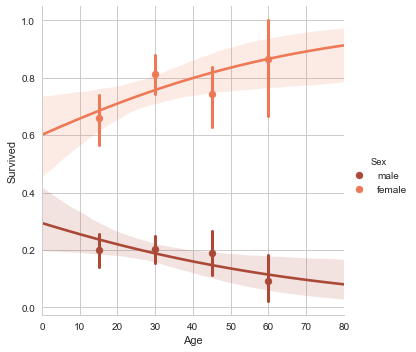

In [15]:
age_bins = [15, 30, 45, 60]
sns.lmplot("Age", "Survived", titanic, hue="Sex",
           palette="OrRd_d", x_bins=age_bins, logistic=True).set(xlim=(0, 80))

In [16]:
titanic["class"] = titanic.Pclass.map({1: "First", 2: "Second", 3: "Third"})
#sns.factorplot("class", data=titanic, hue="Parents/Children Aboard", palette="YlGn")

titanic["PacA"] = titanic['Parents/Children Aboard'].astype('str')

In [17]:
titanic.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
survived                   0
class                      0
PacA                       0
dtype: int64

In [18]:
titanic.sample(10)


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,survived,class,PacA
105,1,3,Miss. Anna Kristine Salkjelsvik,female,21.0,0,0,7.6500,Alive,Third,0
285,0,3,Mr. Penko Naidenoff,male,22.0,0,0,7.8958,Dead,Third,0
409,0,3,Mr. Henry Hart,male,27.0,0,0,6.8583,Dead,Third,0
29,0,3,Mr. Lalio Todoroff,male,23.0,0,0,7.8958,Dead,Third,0
244,0,1,Dr. William Edward Minahan,male,44.0,2,0,90.0000,Dead,First,0
448,0,3,Mr. Ingvald Olai Olsen Hagland,male,28.0,1,0,19.9667,Dead,Third,0
156,0,3,Mr. Harry Corn,male,30.0,0,0,8.0500,Dead,Third,0
850,0,2,Mrs. Ernest Courtenay (Lilian Hughes) Carter,female,44.0,1,0,26.0000,Dead,Second,0
467,0,3,Mr. Arthur Keefe,male,39.0,0,0,7.2500,Dead,Third,0
32,1,3,Miss. Mary Agatha Glynn,female,18.0,0,0,7.7500,Alive,Third,0


# BARPLOTS

C:\Users\OLYMPIA\Anaconda3\lib\site-packages\seaborn\linearmodels.py:5: UserWarning: The `linearmodels` module has been renamed `regression`.
  warnings.warn(msg)


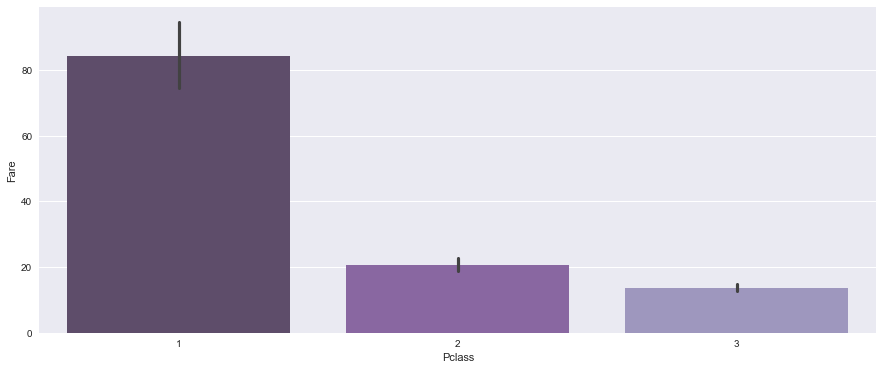

In [19]:
from seaborn import linearmodels
#reload(linearmodels)
#reload(sns)
sns.set(style="darkgrid")

sns.barplot("Pclass", "Fare", data=titanic, palette="BuPu_d")

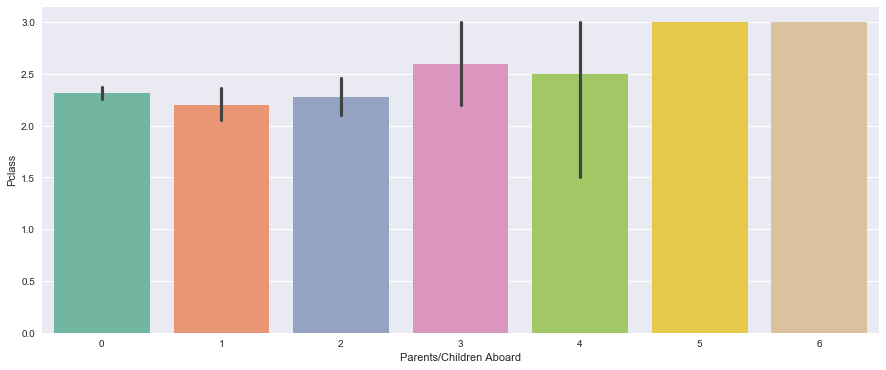

In [20]:
sns.barplot("Parents/Children Aboard", "Pclass", data=titanic, palette="Set2")